<a href="https://colab.research.google.com/github/sanuthit/Risk-Based-Motor-Insurance-Premium-Calculation-System-/blob/risk-model-development/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Risk-Based Motor Insurance Premium + Premium Calculation**

1) Mount Google Drive in Colab

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2) Find the correct path to your dataset folder

In [38]:
import os

root = "/content/drive/MyDrive"
print("MyDrive exists:", os.path.exists(root))
print("Top folders:", os.listdir(root)[:30])


MyDrive exists: True
Top folders: ['Colab Notebooks', 'Data']


In [39]:
DATA_DIR = "/content/drive/MyDrive/Data/Datasets"
print("DATA_DIR exists:", os.path.exists(DATA_DIR))
print(os.listdir(DATA_DIR)[:30])


DATA_DIR exists: True
['premium_dataset_60000_v3_toyota_suzuki_full.csv', 'risk_dataset_60000.csv', 'risk_dataset_60000_toyota_suzuki_v2_cleaned.csv']


3) Load your dataset (CSV or Excel) from Drive

In [40]:
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/Data/Datasets/risk_dataset_60000.csv"
df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()


(60000, 42)


,policy_id,customer_id,driver_age,driver_gender,driver_occupation,years_of_driving_experience,member_automobile_assoc_ceylon,has_previous_motor_policy,ncb_percentage,accidents_last_3_years,...,wc_paid_driver,cover_flood_damage,cover_strike_riot_civil_commotion,vehicle_age_years,vehicle_segment,had_claim_within_1_year,num_claims_within_1_year,approx_market_value,sum_insured,total_claim_amount_within_1_year
0,P000001,C00002,35,M,Accountant,17,1,1,20,1,...,0,1,0,13,Sedan,0,0,9375583,7691446,0
1,P000002,C00003,40,M,Unemployed,16,0,0,0,0,...,0,1,0,22,Sedan,0,0,8789777,8210229,0
2,P000003,C00004,33,F,Businessman,8,0,1,10,4,...,0,0,0,21,SmallCar,1,1,5143262,4628639,680769
3,P000004,C00005,45,F,Farmer,27,0,1,35,0,...,1,0,1,14,SUV,0,0,7518522,7142596,0
4,P000005,C00006,51,F,Businessman,18,0,1,10,1,...,0,0,0,7,SmallCar,0,0,6677872,6343978,0


3) Dataset Overview (Shape + Info)

In [41]:
# Shape
print("Dataset shape (rows, columns):", df.shape)

# Column types & non-null counts
df.info()


Dataset shape (rows, columns): (60000, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   policy_id                          60000 non-null  object
 1   customer_id                        60000 non-null  object
 2   driver_age                         60000 non-null  int64 
 3   driver_gender                      60000 non-null  object
 4   driver_occupation                  60000 non-null  object
 5   years_of_driving_experience        60000 non-null  int64 
 6   member_automobile_assoc_ceylon     60000 non-null  int64 
 7   has_previous_motor_policy          60000 non-null  int64 
 8   ncb_percentage                     60000 non-null  int64 
 9   accidents_last_3_years             60000 non-null  int64 
 10  vehicle_type                       60000 non-null  object
 11  vehicle_make            

In [42]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
driver_age,60000.0,4.636495e+01,1.673863e+01,18.0,32.00,46.0,61.00,75.0
years_of_driving_experience,60000.0,1.419800e+01,1.284497e+01,0.0,4.00,11.0,22.00,57.0
member_automobile_assoc_ceylon,60000.0,2.014167e-01,4.010619e-01,0.0,0.00,0.0,0.00,1.0
has_previous_motor_policy,60000.0,6.006833e-01,4.897620e-01,0.0,0.00,1.0,1.00,1.0
ncb_percentage,60000.0,1.280642e+01,1.483135e+01,0.0,0.00,0.0,25.00,50.0
accidents_last_3_years,60000.0,9.621833e-01,1.364765e+00,0.0,0.00,0.0,2.00,5.0
vehicle_year_of_manufacture,60000.0,2.013507e+03,6.895516e+00,2000.0,2009.00,2013.0,2019.00,2025.0
engine_capacity_cc,60000.0,1.583562e+03,6.975952e+02,660.0,1000.00,1500.0,1800.00,3000.0
has_financial_interest,60000.0,4.001333e-01,4.899292e-01,0.0,0.00,0.0,1.00,1.0
images_uploaded,60000.0,9.013500e-01,2.981940e-01,0.0,1.00,1.0,1.00,1.0


4) Target Variable Distribution

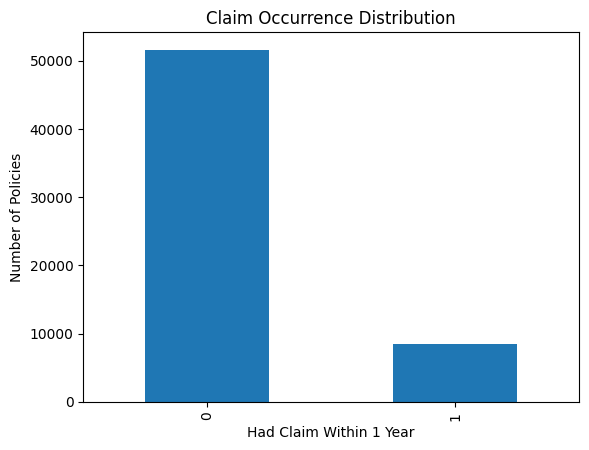

had_claim_within_1_year
0    51590
1     8410
Name: count, dtype: int64
had_claim_within_1_year
0    85.983333
1    14.016667
Name: count, dtype: float64


In [43]:
import matplotlib.pyplot as plt

target_counts = df["had_claim_within_1_year"].value_counts()

plt.figure()
target_counts.plot(kind="bar")
plt.title("Claim Occurrence Distribution")
plt.xlabel("Had Claim Within 1 Year")
plt.ylabel("Number of Policies")
plt.show()

print(target_counts)
print(target_counts / len(df) * 100)


5. Numerical Feature Distributions

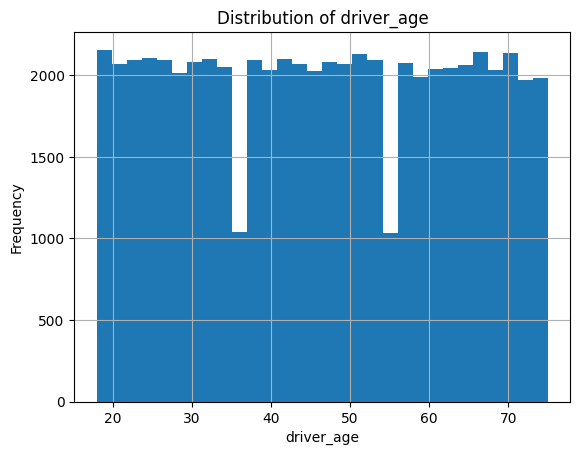

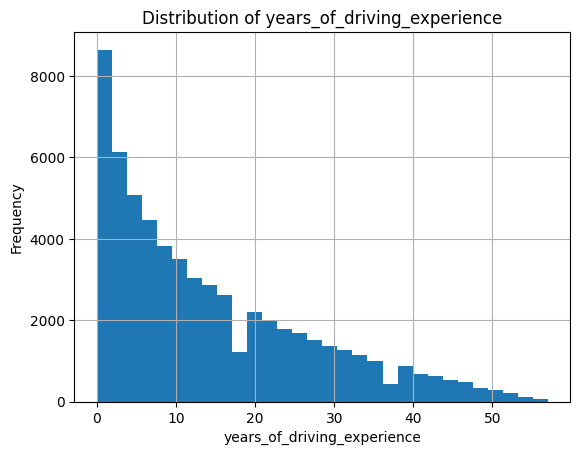

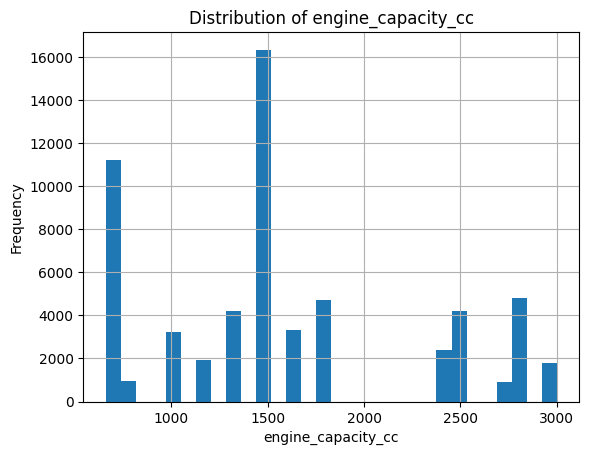

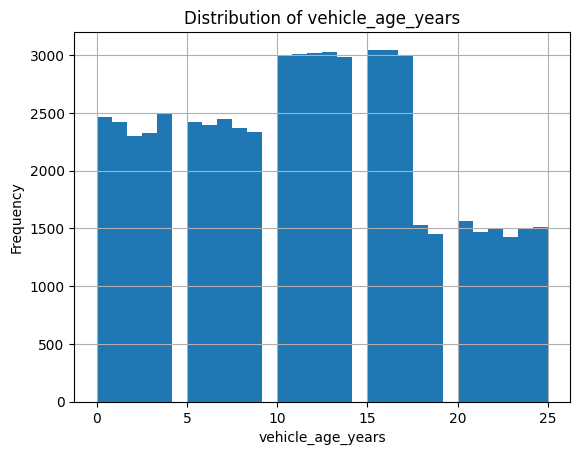

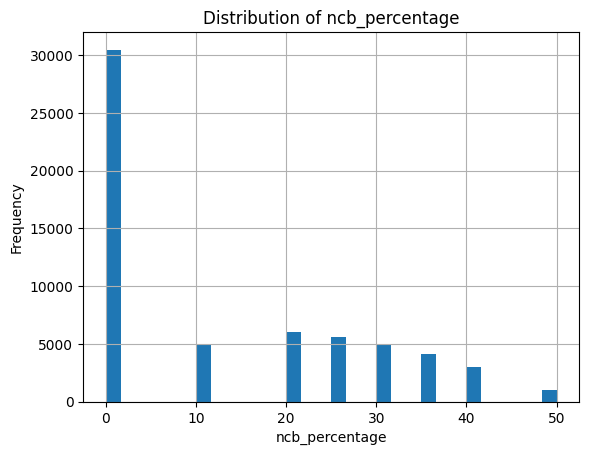

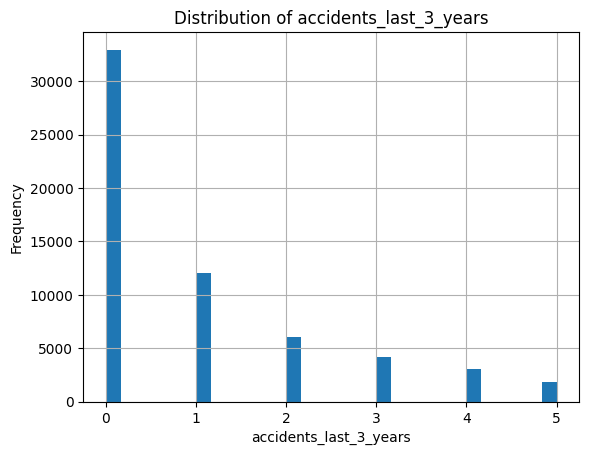

In [44]:
num_cols = [
    "driver_age",
    "years_of_driving_experience",
    "engine_capacity_cc",
    "vehicle_age_years",
    "ncb_percentage",
    "accidents_last_3_years"
]

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


6. Outlier Analysis

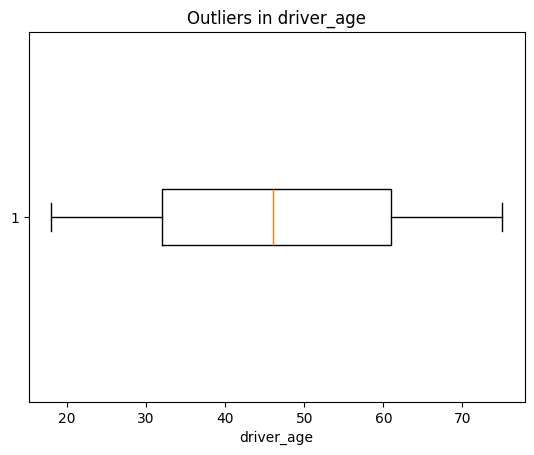

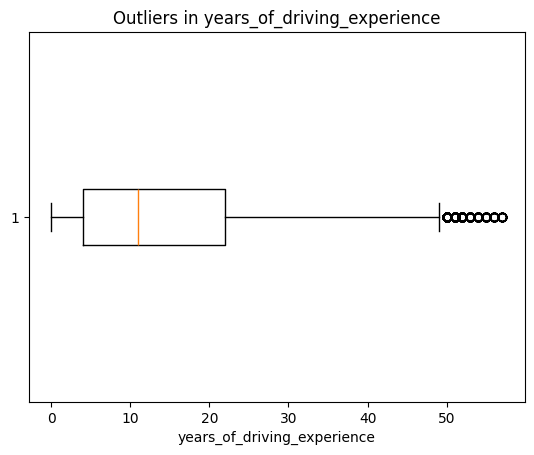

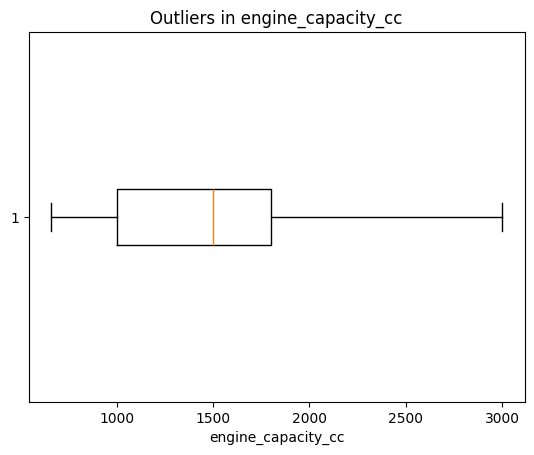

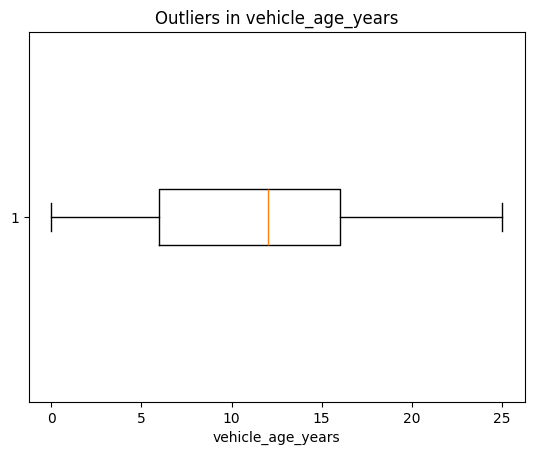

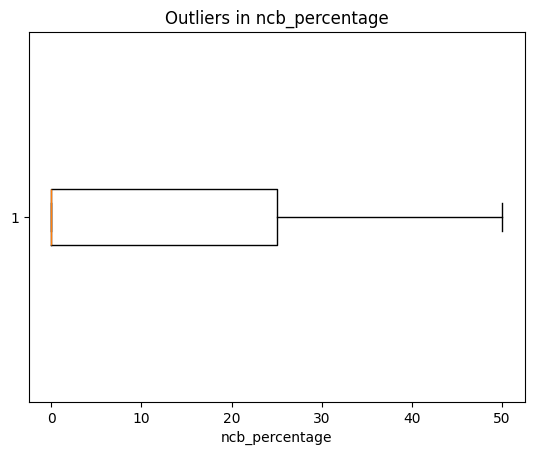

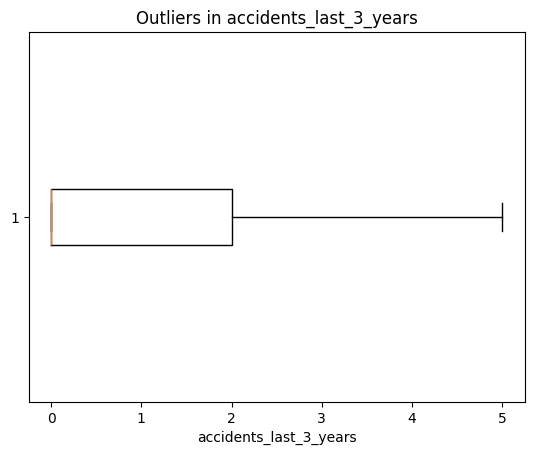

In [45]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()


7. Claim vs Non-Claim Comparison

<Figure size 640x480 with 0 Axes>

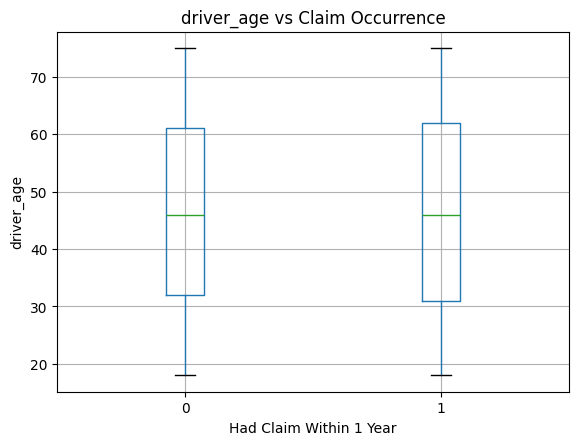

<Figure size 640x480 with 0 Axes>

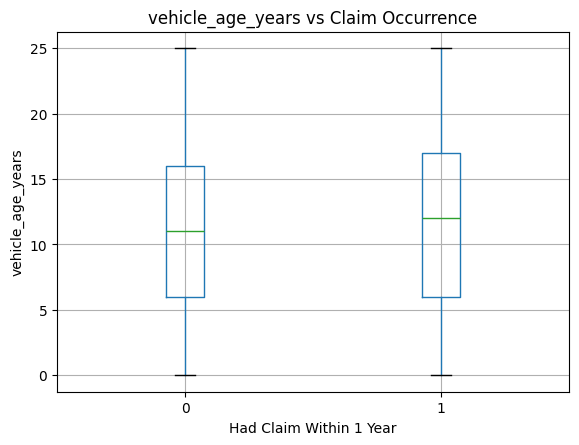

<Figure size 640x480 with 0 Axes>

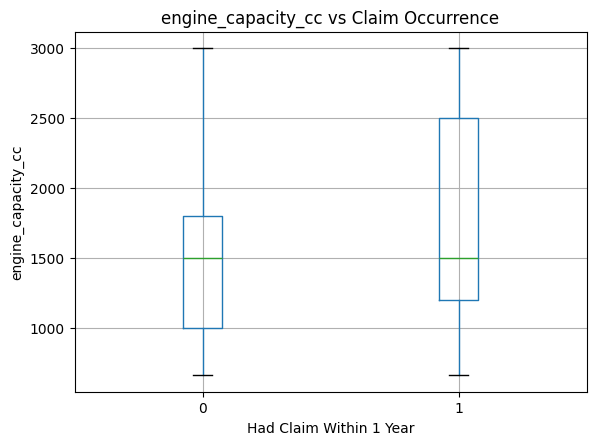

<Figure size 640x480 with 0 Axes>

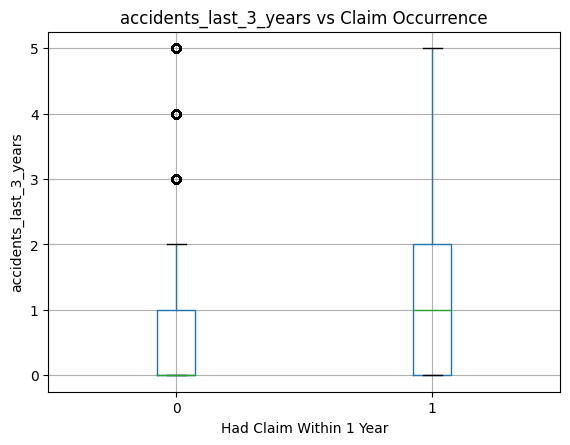

In [46]:
for col in [
    "driver_age",
    "vehicle_age_years",
    "engine_capacity_cc",
    "accidents_last_3_years"
]:
    plt.figure()
    df.boxplot(column=col, by="had_claim_within_1_year")
    plt.title(f"{col} vs Claim Occurrence")
    plt.suptitle("")
    plt.xlabel("Had Claim Within 1 Year")
    plt.ylabel(col)
    plt.show()


8. Categorical Variable Impact on Claims

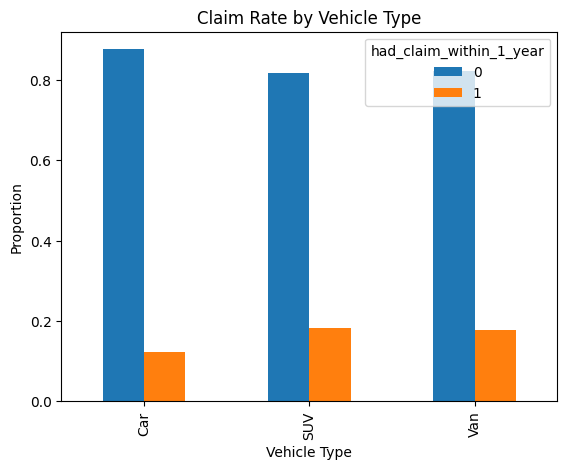

In [47]:
import pandas as pd

vehicle_claim_rate = pd.crosstab(
    df["vehicle_type"],
    df["had_claim_within_1_year"],
    normalize="index"
)

vehicle_claim_rate.plot(kind="bar")
plt.title("Claim Rate by Vehicle Type")
plt.ylabel("Proportion")
plt.xlabel("Vehicle Type")
plt.show()


9. Correlation Analysis

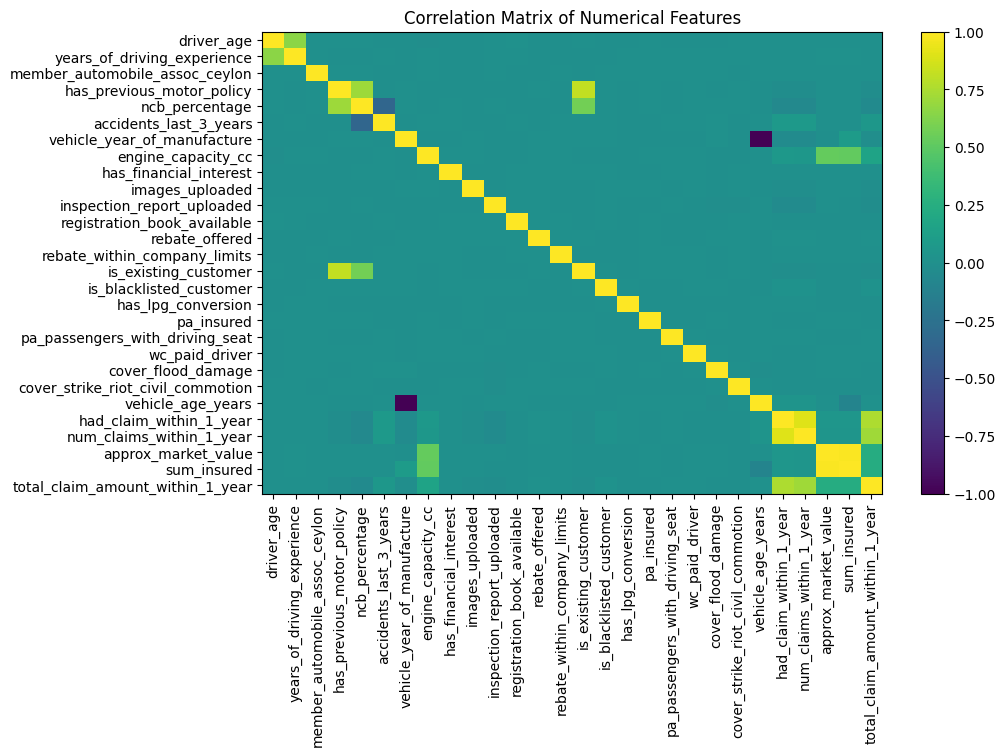

In [48]:
import numpy as np

num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
plt.imshow(num_df.corr(), aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


10. Outlier Count

In [49]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()

for col in num_cols:
    print(f"{col}: {count_outliers(df[col])} outliers")


driver_age: 0 outliers
years_of_driving_experience: 664 outliers
engine_capacity_cc: 0 outliers
vehicle_age_years: 0 outliers
ncb_percentage: 0 outliers
accidents_last_3_years: 0 outliers


11. Handle missing values

In [50]:
df_clean = df.copy()


# Document-related fields: missing = 0
document_cols = [
    "images_uploaded",
    "inspection_report_uploaded",
    "registration_book_available"
]

for col in document_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0).astype(int)

# Categorical fields: missing = "Unknown"
cat_cols = df_clean.select_dtypes(include="object").columns
df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")

12. Range validation

In [51]:
from datetime import datetime

current_year = datetime.now().year

df_clean = df_clean[
    (df_clean["driver_age"].between(18, 85)) &
    (df_clean["engine_capacity_cc"].between(600, 5000)) &
    (df_clean["vehicle_year_of_manufacture"].between(1985, current_year)) &
    (df_clean["ncb_percentage"].between(0, 65))
]


13. Logic constraints

In [52]:
# Driving experience rule
df_clean = df_clean[
    df_clean["years_of_driving_experience"] <= (df_clean["driver_age"] - 18)
]

# Vehicle age derivation
df_clean["vehicle_age_years"] = current_year - df_clean["vehicle_year_of_manufacture"]

# NCB logic
df_clean.loc[
    df_clean["has_previous_motor_policy"] == 0,
    "ncb_percentage"
] = 0

# Blacklisted customer hard flag
df_clean["hard_flag_blacklist"] = (
    df_clean["is_blacklisted_customer"] == 1
).astype(int)

In [53]:
print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)

df_clean.head()

Before cleaning: (60000, 42)
After cleaning: (60000, 43)


,policy_id,customer_id,driver_age,driver_gender,driver_occupation,years_of_driving_experience,member_automobile_assoc_ceylon,has_previous_motor_policy,ncb_percentage,accidents_last_3_years,...,cover_flood_damage,cover_strike_riot_civil_commotion,vehicle_age_years,vehicle_segment,had_claim_within_1_year,num_claims_within_1_year,approx_market_value,sum_insured,total_claim_amount_within_1_year,hard_flag_blacklist
0,P000001,C00002,35,M,Accountant,17,1,1,20,1,...,1,0,13,Sedan,0,0,9375583,7691446,0,0
1,P000002,C00003,40,M,Unemployed,16,0,0,0,0,...,1,0,22,Sedan,0,0,8789777,8210229,0,0
2,P000003,C00004,33,F,Businessman,8,0,1,10,4,...,0,0,21,SmallCar,1,1,5143262,4628639,680769,0
3,P000004,C00005,45,F,Farmer,27,0,1,35,0,...,0,1,14,SUV,0,0,7518522,7142596,0,0
4,P000005,C00006,51,F,Businessman,18,0,1,10,1,...,0,0,7,SmallCar,0,0,6677872,6343978,0,0


In [54]:
CLEAN_PATH = "/content/drive/MyDrive/Data/Datasets/risk_dataset_60000_toyota_suzuki_v2_cleaned.csv"

df_clean.to_csv(CLEAN_PATH, index=False)

print("✅ Cleaned dataset saved at:")
print(CLEAN_PATH)


✅ Cleaned dataset saved at:
/content/drive/MyDrive/Data/Datasets/risk_dataset_60000_toyota_suzuki_v2_cleaned.csv


In [55]:
import os

os.path.exists(CLEAN_PATH)


True

In [56]:
pd.read_csv(CLEAN_PATH).shape


(60000, 43)

In [57]:
df_clean["hard_flag_blacklist"].value_counts()


,count
hard_flag_blacklist,
0,58172
1,1828


## driver_age_band

In [58]:
df_fe = df_clean.copy()

df_fe["driver_age_band"] = pd.cut(
    df_fe["driver_age"],
    bins=[17, 24, 34, 44, 59, 120],
    labels=["18–24", "25–34", "35–44", "45–59", "60+"]
)


In [59]:
df_fe.head(5)

,policy_id,customer_id,driver_age,driver_gender,driver_occupation,years_of_driving_experience,member_automobile_assoc_ceylon,has_previous_motor_policy,ncb_percentage,accidents_last_3_years,...,cover_strike_riot_civil_commotion,vehicle_age_years,vehicle_segment,had_claim_within_1_year,num_claims_within_1_year,approx_market_value,sum_insured,total_claim_amount_within_1_year,hard_flag_blacklist,driver_age_band
0,P000001,C00002,35,M,Accountant,17,1,1,20,1,...,0,13,Sedan,0,0,9375583,7691446,0,0,35–44
1,P000002,C00003,40,M,Unemployed,16,0,0,0,0,...,0,22,Sedan,0,0,8789777,8210229,0,0,35–44
2,P000003,C00004,33,F,Businessman,8,0,1,10,4,...,0,21,SmallCar,1,1,5143262,4628639,680769,0,25–34
3,P000004,C00005,45,F,Farmer,27,0,1,35,0,...,1,14,SUV,0,0,7518522,7142596,0,0,45–59
4,P000005,C00006,51,F,Businessman,18,0,1,10,1,...,0,7,SmallCar,0,0,6677872,6343978,0,0,45–59


## vehicle_age_band

In [60]:
df_fe["vehicle_age_band"] = pd.cut(
    df_fe["vehicle_age_years"],
    bins=[-1, 3, 7, 12, 100],
    labels=["0–3", "4–7", "8–12", "13+"]
)


In [61]:
df_fe[
    ["driver_age", "driver_age_band",
     "vehicle_age_years", "vehicle_age_band"]
].head(10)


,driver_age,driver_age_band,vehicle_age_years,vehicle_age_band
0,35,35–44,13,13+
1,40,35–44,22,13+
2,33,25–34,21,13+
3,45,45–59,14,13+
4,51,45–59,7,4–7
5,63,60+,0,0–3
6,31,25–34,10,8–12
7,63,60+,18,13+
8,57,45–59,19,13+
9,44,35–44,5,4–7


In [62]:
df_fe["driver_age_band"].value_counts()


,count
driver_age_band,
60+,16405
45–59,15494
35–44,10370
25–34,10353
18–24,7378


In [63]:

df_fe["vehicle_age_band"].value_counts()


,count
vehicle_age_band,
13+,27026
8–12,13725
4–7,9743
0–3,9506


In [64]:
df_fe["risk_exposure_proxy"] = np.where(
    df_fe["vehicle_usage_type"].str.lower().isin(
        ["commercial", "hire", "rent", "goods transport", "passenger hire"]
    ),
    "High",
    "Low"
)


In [65]:
doc_cols = [
    "images_uploaded",
    "inspection_report_uploaded",
    "registration_book_available"
]

df_fe["doc_missing_score"] = (
    (df_fe[doc_cols] == 0).sum(axis=1)
)


In [66]:
df_fe["compliance_risk_score"] = (
    ((df_fe["rebate_offered"] == 1) & (df_fe["rebate_within_company_limits"] == 0)).astype(int)
    + (df_fe["registration_book_available"] == 0).astype(int)
    + (df_fe["inspection_report_uploaded"] == 0).astype(int)
)


In [67]:
df_fe["ncb_validity_flag"] = np.where(
    (df_fe["has_previous_motor_policy"] == 0) &
    (df_fe["ncb_percentage"] > 0),
    1,
    0
)


In [68]:
df_fe[
    [
        "driver_age", "driver_age_band",
        "vehicle_age_years", "vehicle_age_band",
        "vehicle_usage_type", "risk_exposure_proxy",
        "doc_missing_score",
        "compliance_risk_score",
        "ncb_validity_flag"
    ]
].head(10)


,driver_age,driver_age_band,vehicle_age_years,vehicle_age_band,vehicle_usage_type,risk_exposure_proxy,doc_missing_score,compliance_risk_score,ncb_validity_flag
0,35,35–44,13,13+,Private,Low,1,1,0
1,40,35–44,22,13+,Private,Low,0,1,0
2,33,25–34,21,13+,Private,Low,1,0,0
3,45,45–59,14,13+,Hire,High,0,0,0
4,51,45–59,7,4–7,Hire,High,1,1,0
5,63,60+,0,0–3,Private,Low,1,0,0
6,31,25–34,10,8–12,Private,Low,0,0,0
7,63,60+,18,13+,Hire,High,0,0,0
8,57,45–59,19,13+,Private,Low,0,0,0
9,44,35–44,5,4–7,Private,Low,0,0,0


In [69]:
CLEAN_PATH = "/content/drive/MyDrive/Data/Datasets/risk_dataset_60000_toyota_suzuki_v2_cleaned.csv"

df_fe.to_csv(CLEAN_PATH, index=False)

print("✅ Cleaned + feature-engineered dataset overwritten successfully:")
print(CLEAN_PATH)


✅ Cleaned + feature-engineered dataset overwritten successfully:
/content/drive/MyDrive/Data/Datasets/risk_dataset_60000_toyota_suzuki_v2_cleaned.csv


In [70]:
df_check = pd.read_csv(CLEAN_PATH)
df_check.shape

(60000, 49)

In [71]:
new_cols = {
    "driver_age_band",
    "vehicle_age_band",
    "risk_exposure_proxy",
    "doc_missing_score",
    "compliance_risk_score",
    "ncb_validity_flag"
}

print(new_cols.issubset(df_check.columns))

True
